In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)

In [5]:
#zelimo da klasifikujemo buduce uzorke, kako bi odredili da li pripadaju grupi g ili e (gamma ili hadron)

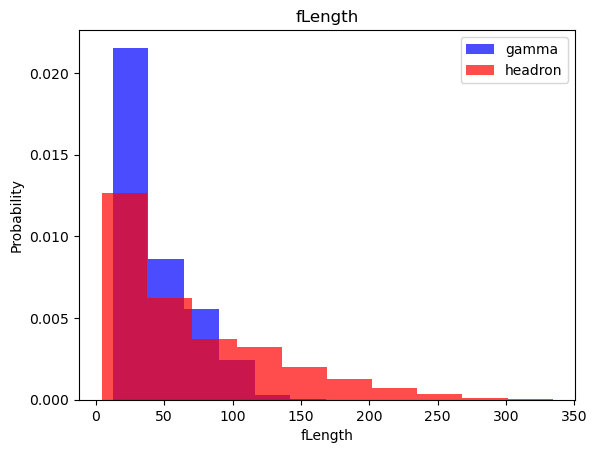

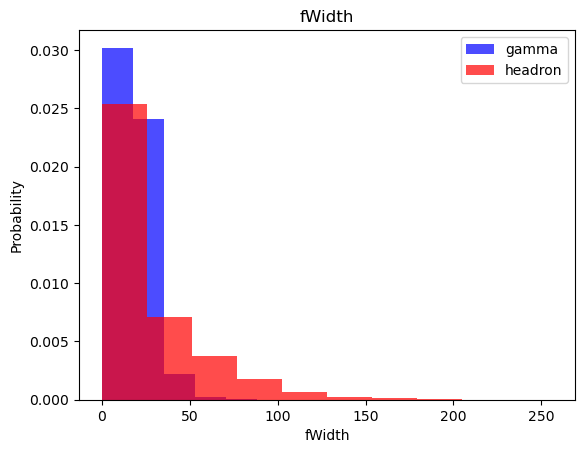

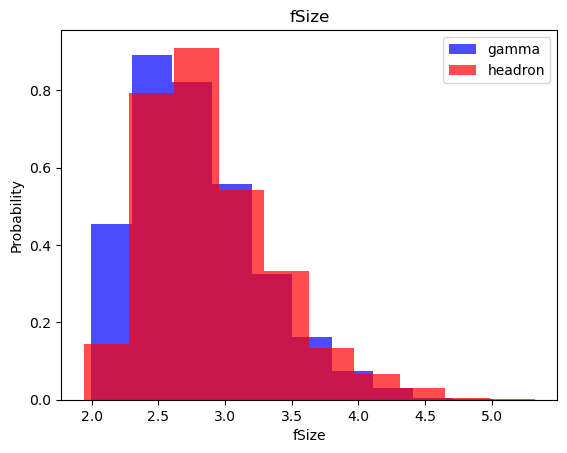

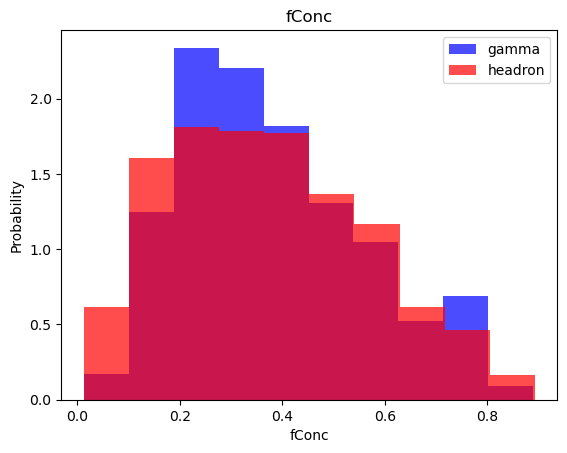

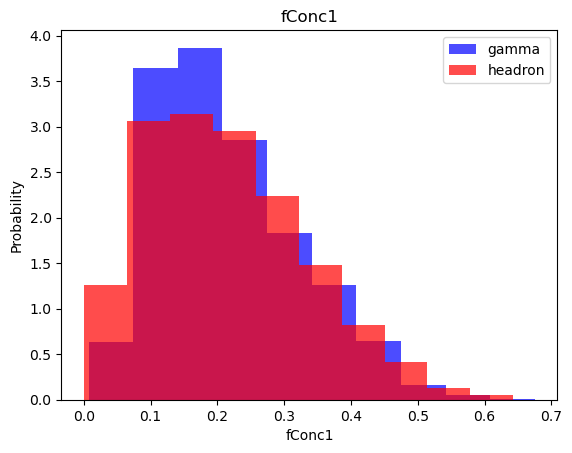

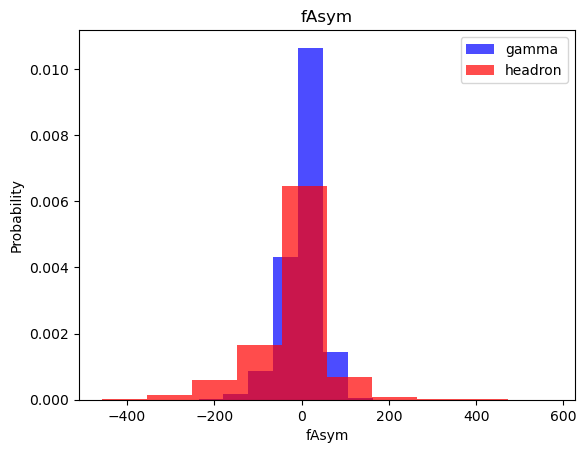

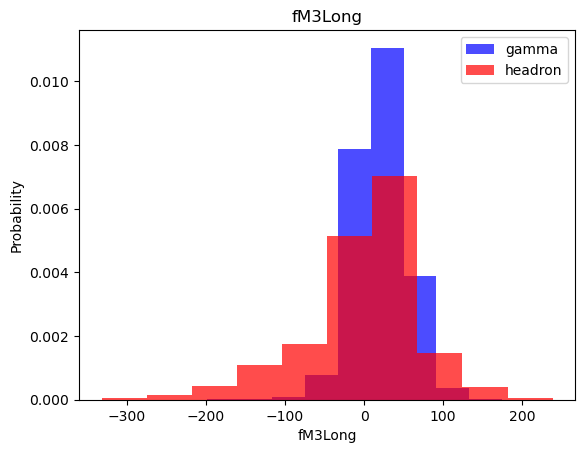

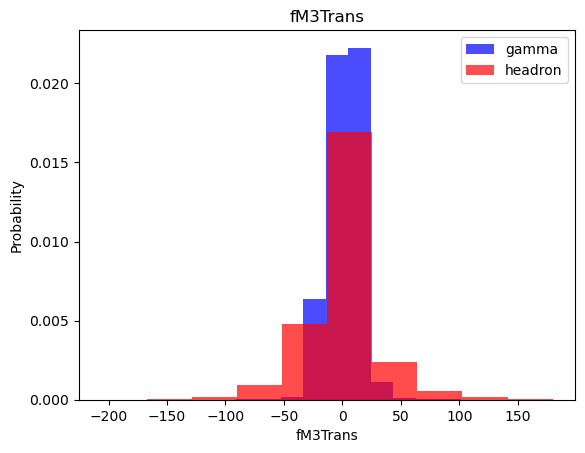

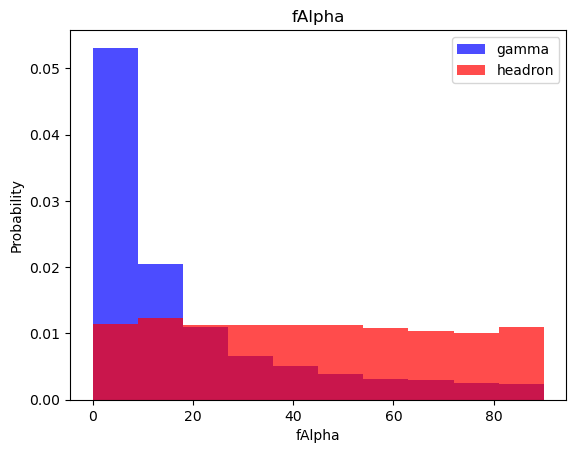

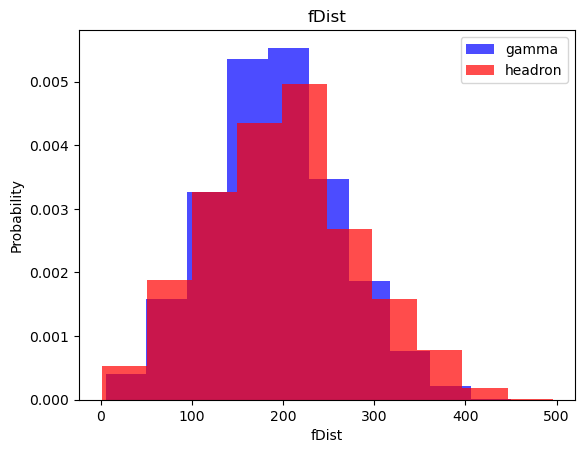

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 0][label], color = 'red', label = 'headron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    # density normalises distributions (dristributes by number of samples) and that is why y label is probability

In [7]:
#train, validation and test datasets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\kovac_impo9dd\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
#skaliranje obelezja (standardizacija - srednja vrednost 0 i standardna devijacija 1) 
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values # ceo dataset bez poslednje kolone
    y = dataframe[dataframe.columns[-1]].values # poslednja kolona
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y) # uzimaj vise uzoraka iz manje klase(ponavljaj ih)

    data = np.hstack((X, np.reshape(y, (-1, 1)))) #nalepi X na y

    return data, X, y

In [9]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #headron

7391
4021


In [10]:
# zelimo da povecamo broj uzoraka koji reprezentuju headron, da bi odnos broja uzoraka bio vise balansiran -> RandomOverSampler

In [11]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

klasifikacioni modeli

 kNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1350
           1       0.83      0.89      0.86      2454

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49      1350
           1       0.73      0.89      0.80      2454

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1350
           1       0.83      0.82      0.82      2454

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Support Vector Machines

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1350
           1       0.88      0.90      0.89      2454

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.86      3804



Neural Networks

In [25]:
import tensorflow as tf

In [26]:
#preuzeto sa tensorflow sajta - loss i accuracy po epohama(jedan trening ciklus)
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()


In [27]:
def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)), #first hidden layer
        tf.keras.layers.Dropout(dropout_prob), #randomly choose certain nodes and don't train them (helps prevent overfitting)
        tf.keras.layers.Dense(num_nodes, activation = 'relu'), #second hidden layer
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation = 'sigmoid'), #output layer, projecting predictions to be 0 or 1
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss = 'binary_crossentropy', 
                     metrics = ['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
    )

    return nn_model, history

16 nodes, dropout 0, learning_rate 0.1, batch_size 32


C:\Users\kovac_impo9dd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


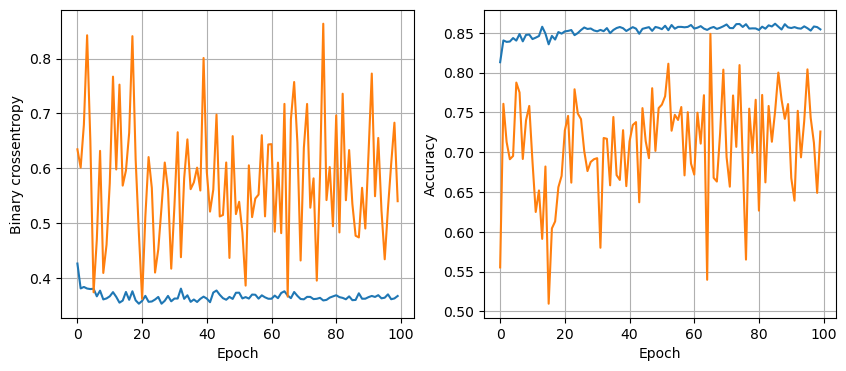

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.8621 - loss: 0.3745
16 nodes, dropout 0, learning_rate 0.1, batch_size 64


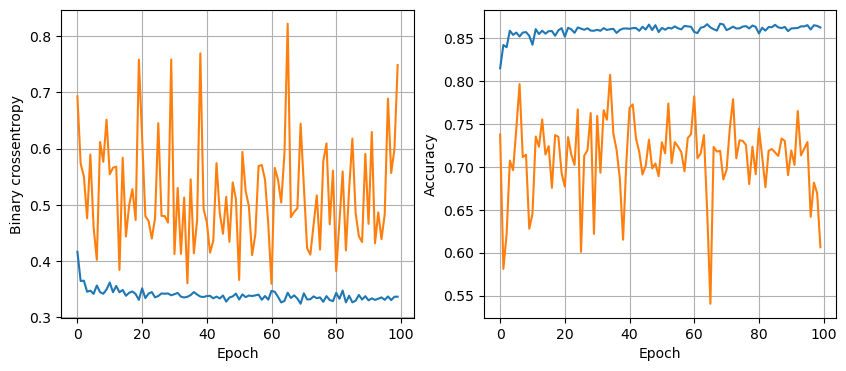

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8419 - loss: 0.3564
16 nodes, dropout 0, learning_rate 0.1, batch_size 128


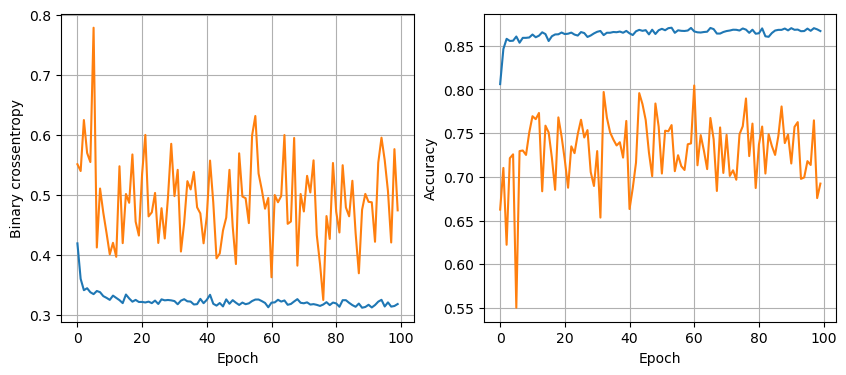

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8560 - loss: 0.3509
16 nodes, dropout 0, learning_rate 0.005, batch_size 32


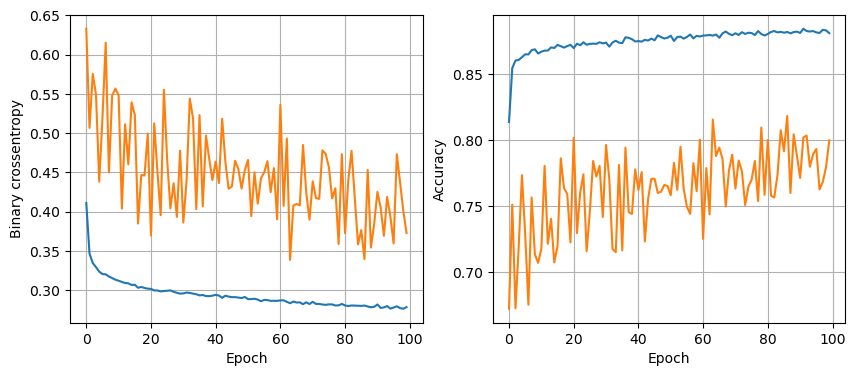

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8707 - loss: 0.3268
16 nodes, dropout 0, learning_rate 0.005, batch_size 64


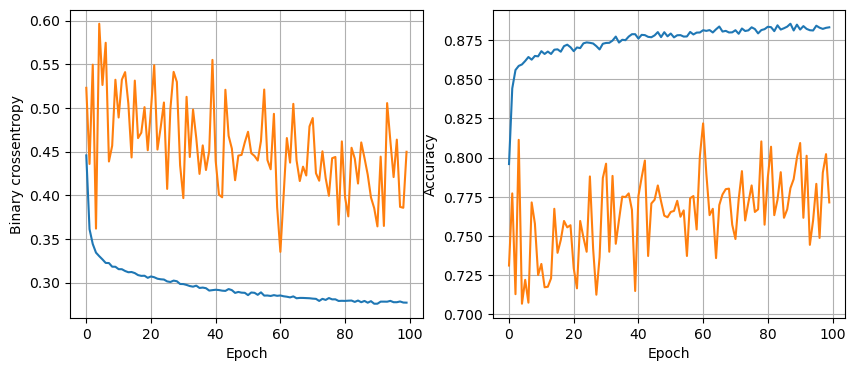

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.8691 - loss: 0.3282
16 nodes, dropout 0, learning_rate 0.005, batch_size 128


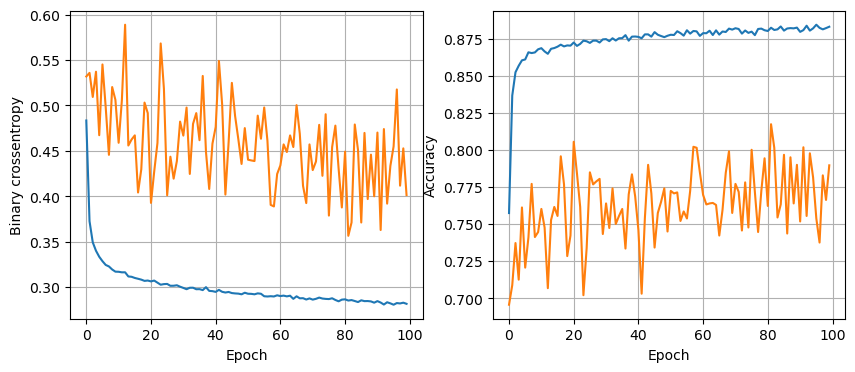

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3359
16 nodes, dropout 0, learning_rate 0.001, batch_size 32


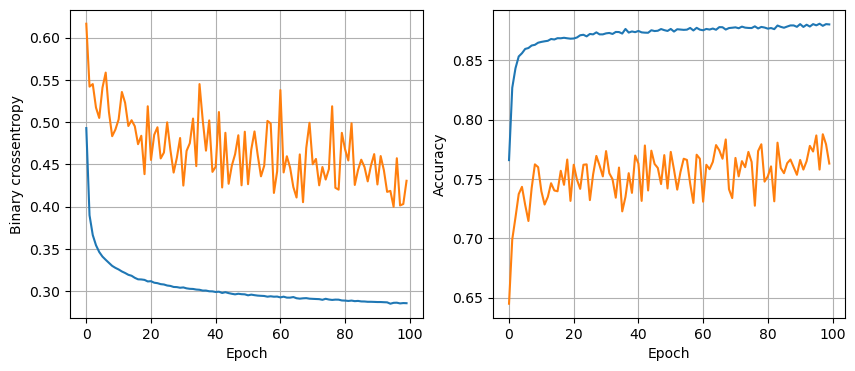

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8655 - loss: 0.3255
16 nodes, dropout 0, learning_rate 0.001, batch_size 64


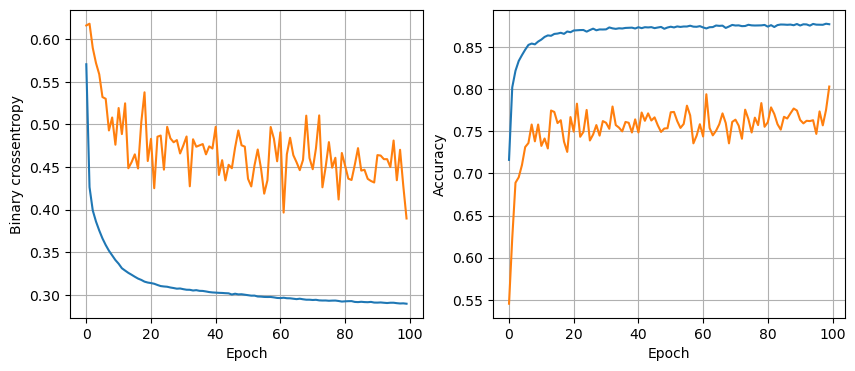

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.3386  
16 nodes, dropout 0, learning_rate 0.001, batch_size 128


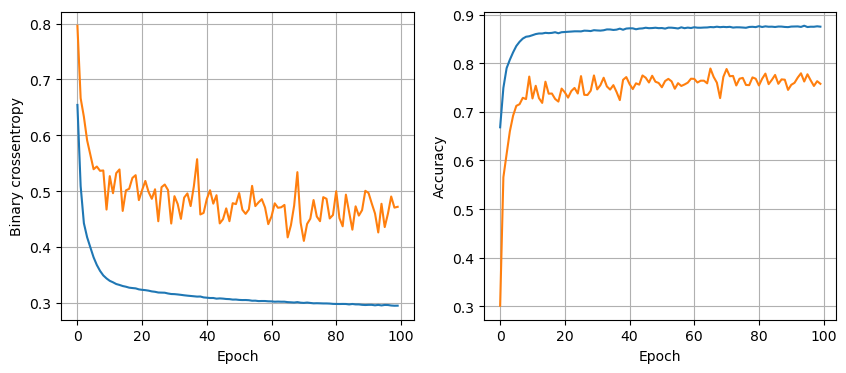

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3254  
16 nodes, dropout 0.2, learning_rate 0.1, batch_size 32


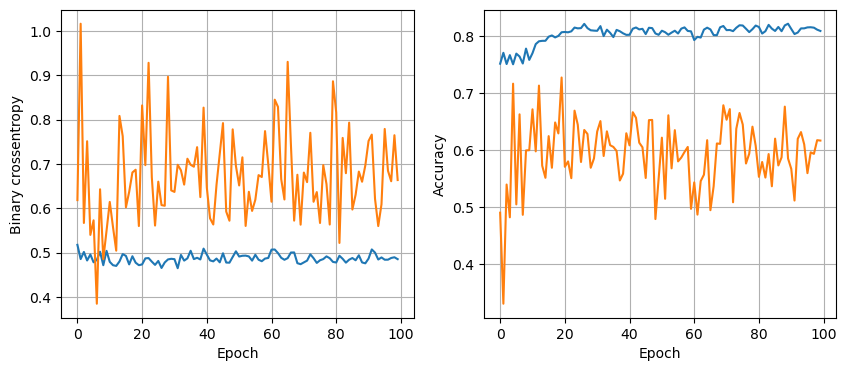

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8344 - loss: 0.4502
16 nodes, dropout 0.2, learning_rate 0.1, batch_size 64


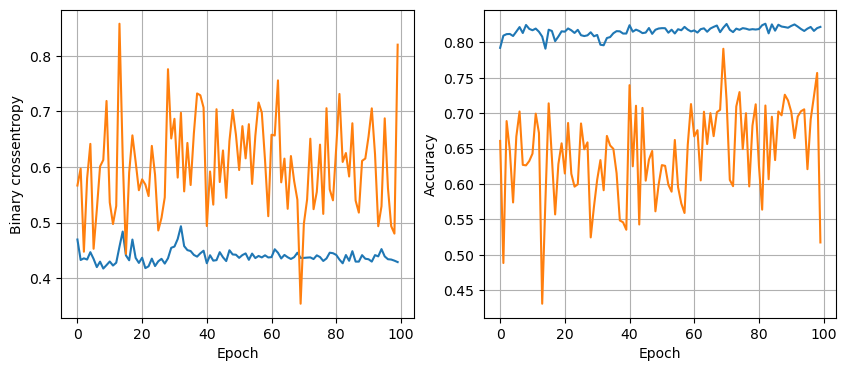

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8237 - loss: 0.4024
16 nodes, dropout 0.2, learning_rate 0.1, batch_size 128


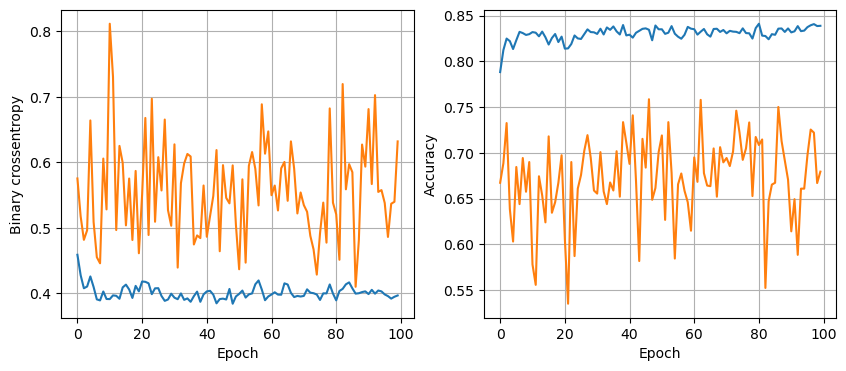

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8572 - loss: 0.3521
16 nodes, dropout 0.2, learning_rate 0.005, batch_size 32


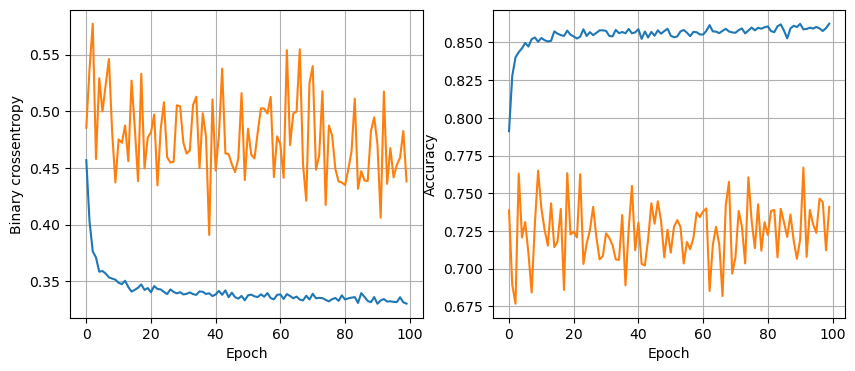

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3212
16 nodes, dropout 0.2, learning_rate 0.005, batch_size 64


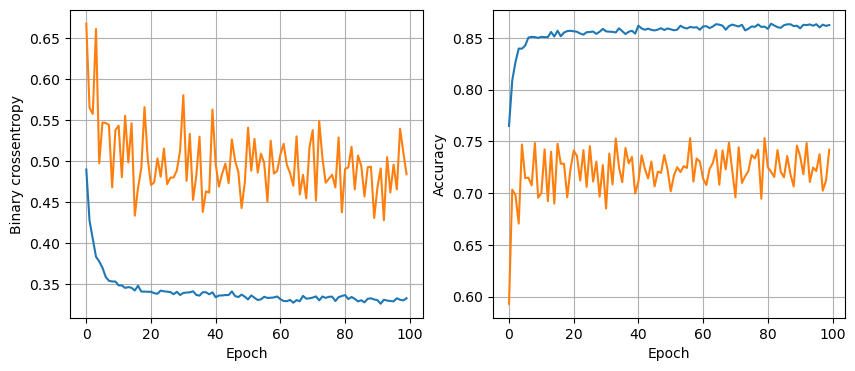

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8693 - loss: 0.3111
16 nodes, dropout 0.2, learning_rate 0.005, batch_size 128


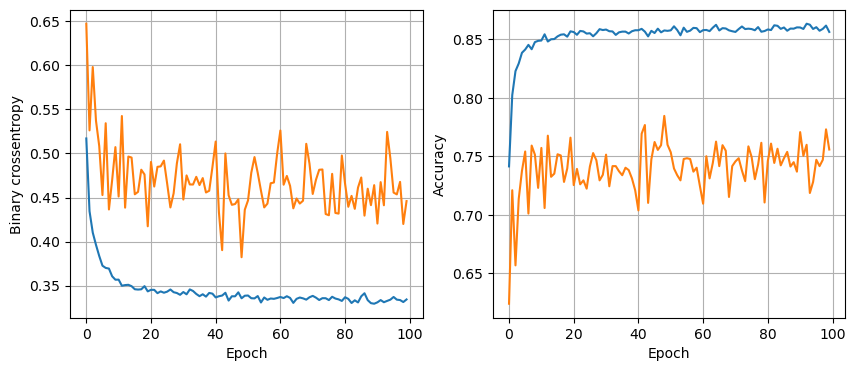

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3186
16 nodes, dropout 0.2, learning_rate 0.001, batch_size 32


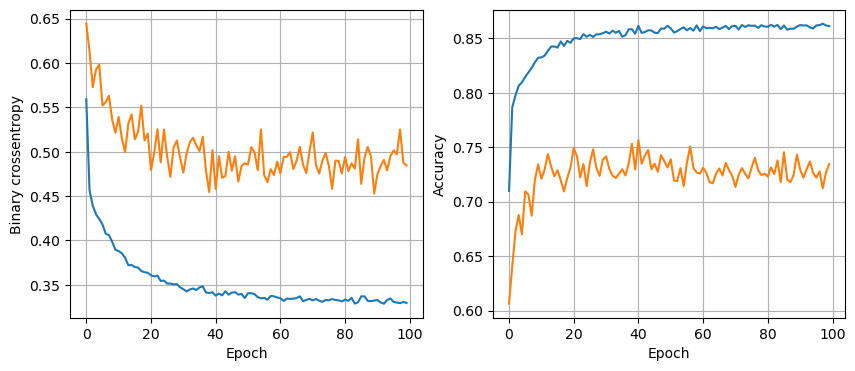

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3175
16 nodes, dropout 0.2, learning_rate 0.001, batch_size 64


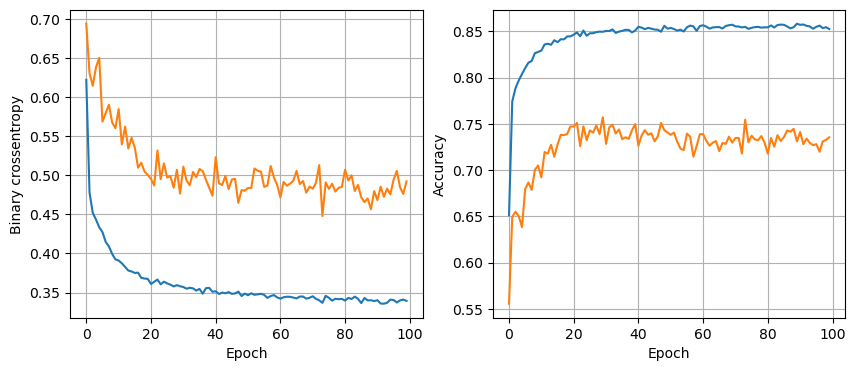

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8531 - loss: 0.3235
16 nodes, dropout 0.2, learning_rate 0.001, batch_size 128


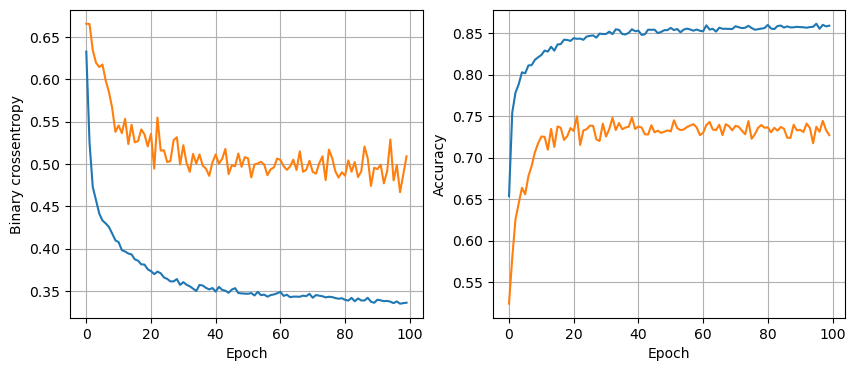

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3190
32 nodes, dropout 0, learning_rate 0.1, batch_size 32


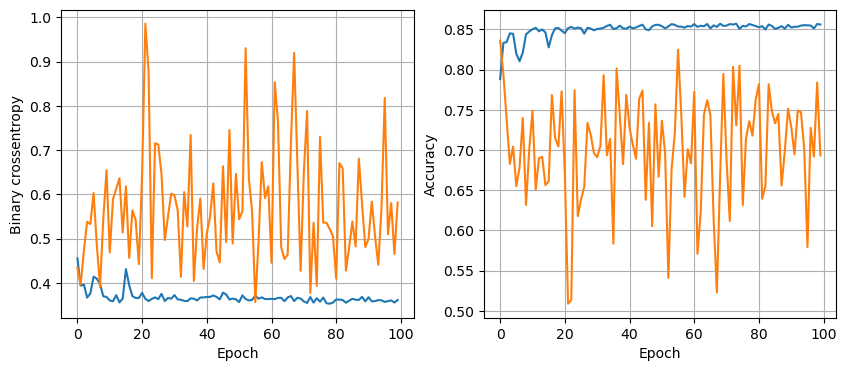

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8465 - loss: 0.3831
32 nodes, dropout 0, learning_rate 0.1, batch_size 64


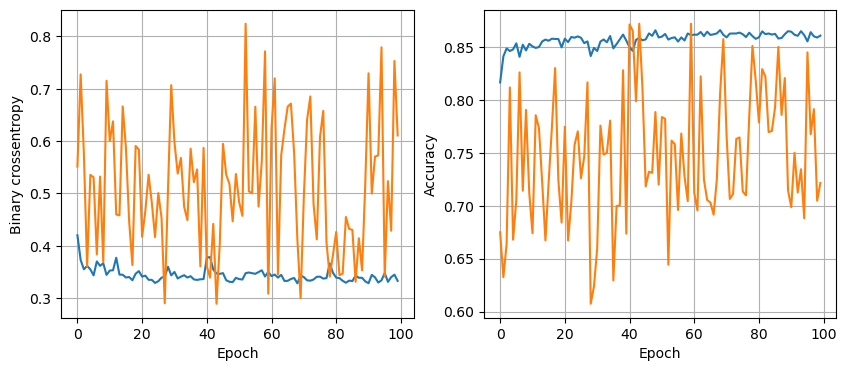

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8531 - loss: 0.3673
32 nodes, dropout 0, learning_rate 0.1, batch_size 128


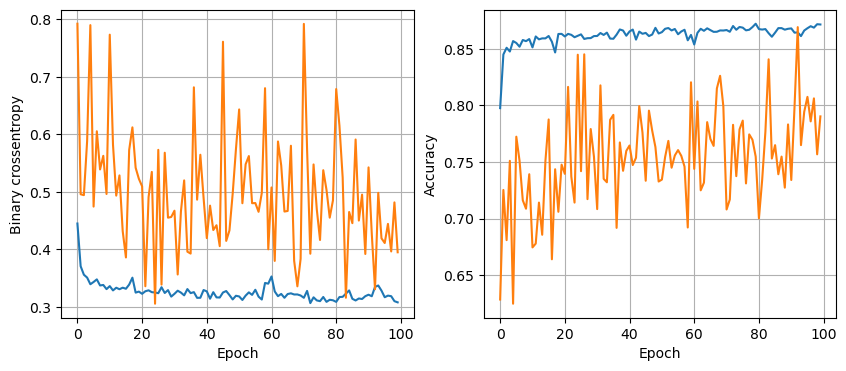

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3422
32 nodes, dropout 0, learning_rate 0.005, batch_size 32


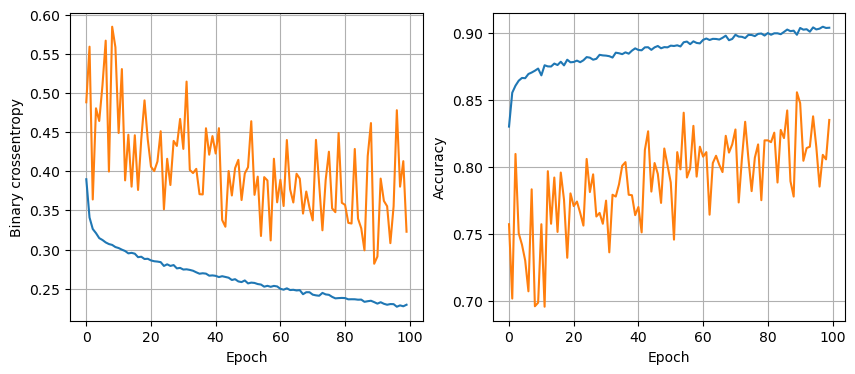

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8654 - loss: 0.4239
32 nodes, dropout 0, learning_rate 0.005, batch_size 64


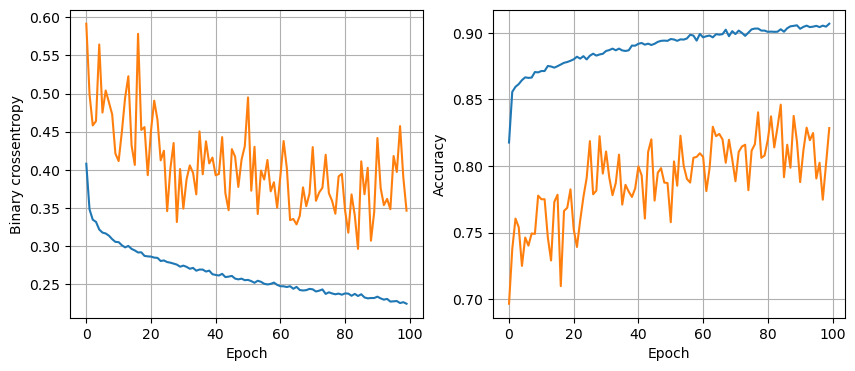

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.3781
32 nodes, dropout 0, learning_rate 0.005, batch_size 128


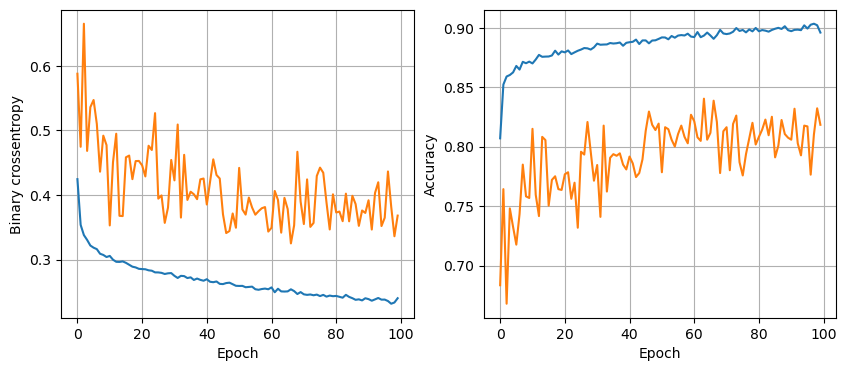

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8557 - loss: 0.3618
32 nodes, dropout 0, learning_rate 0.001, batch_size 32


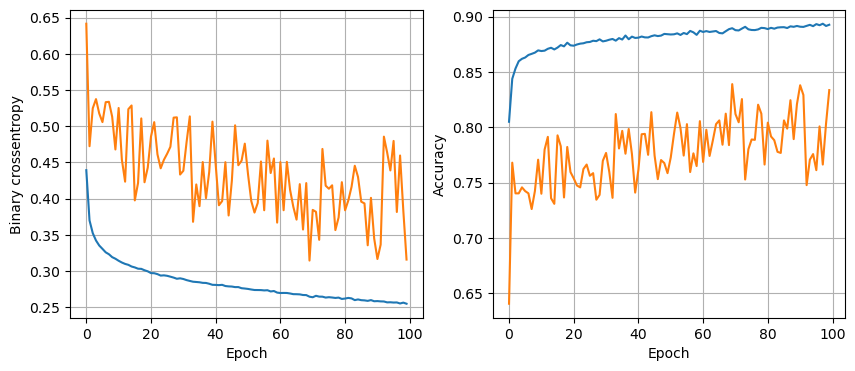

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3473
32 nodes, dropout 0, learning_rate 0.001, batch_size 64


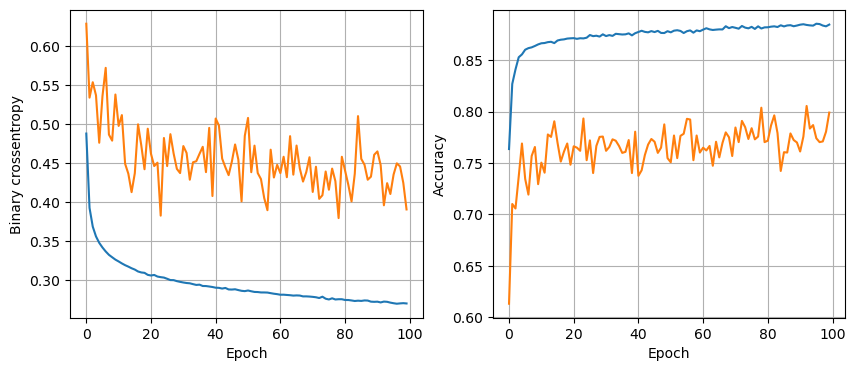

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8599 - loss: 0.3342
32 nodes, dropout 0, learning_rate 0.001, batch_size 128


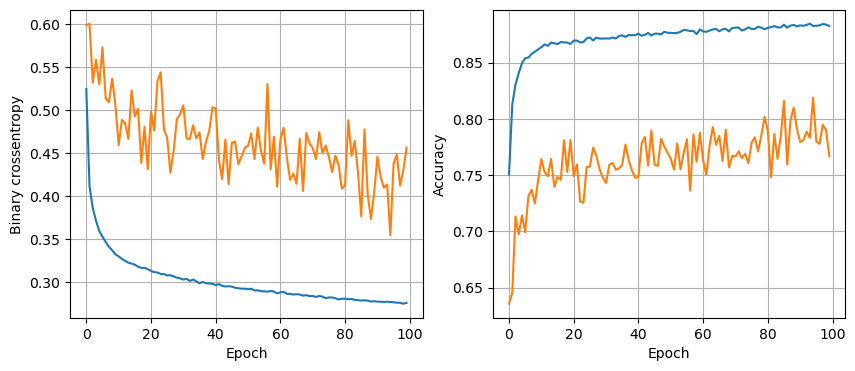

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3237
32 nodes, dropout 0.2, learning_rate 0.1, batch_size 32


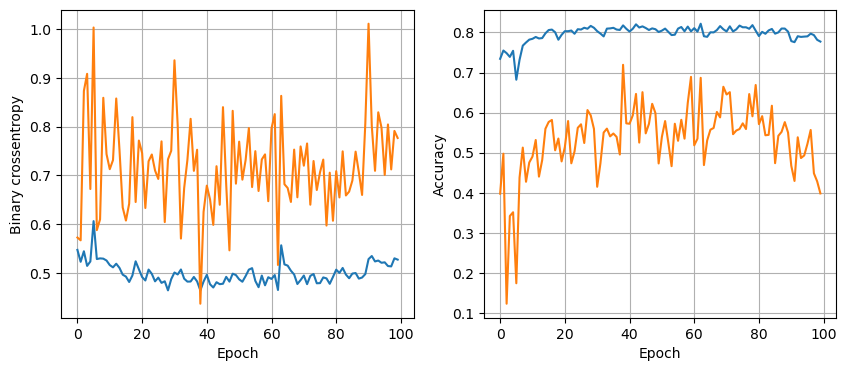

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7806 - loss: 0.5111
32 nodes, dropout 0.2, learning_rate 0.1, batch_size 64


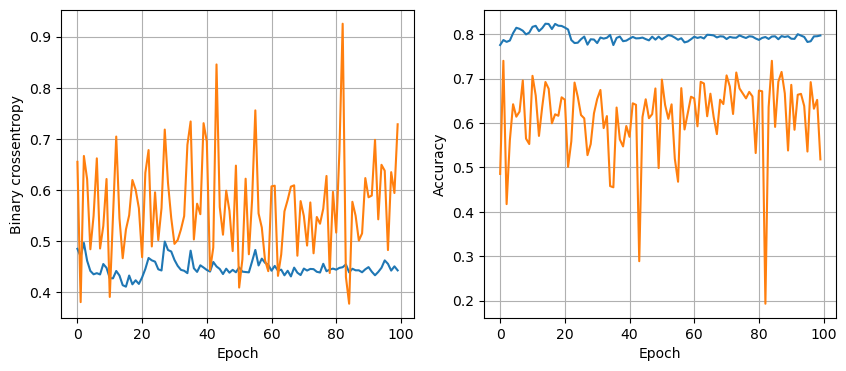

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.3870
32 nodes, dropout 0.2, learning_rate 0.1, batch_size 128


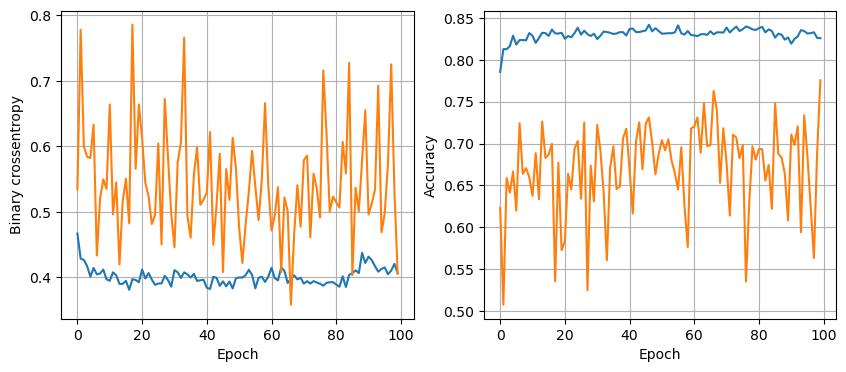

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.3869
32 nodes, dropout 0.2, learning_rate 0.005, batch_size 32


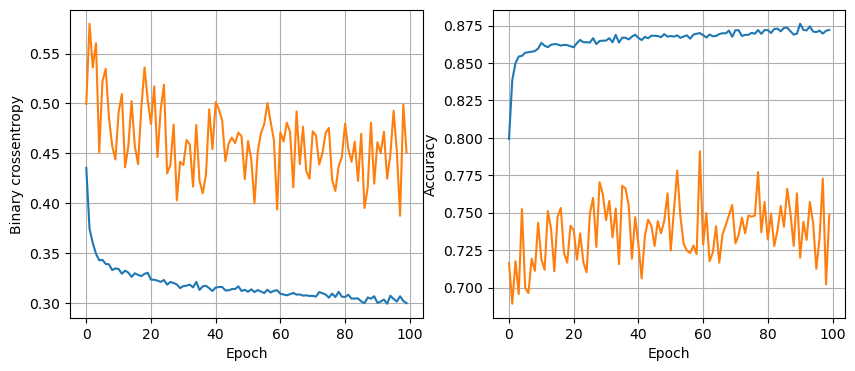

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3079
32 nodes, dropout 0.2, learning_rate 0.005, batch_size 64


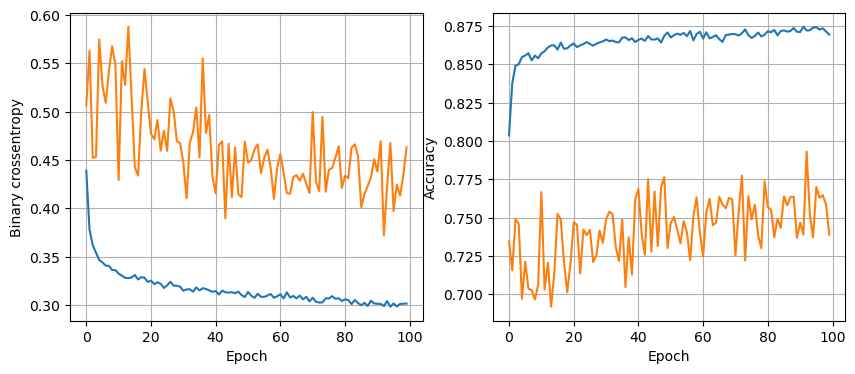

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8730 - loss: 0.3007
32 nodes, dropout 0.2, learning_rate 0.005, batch_size 128


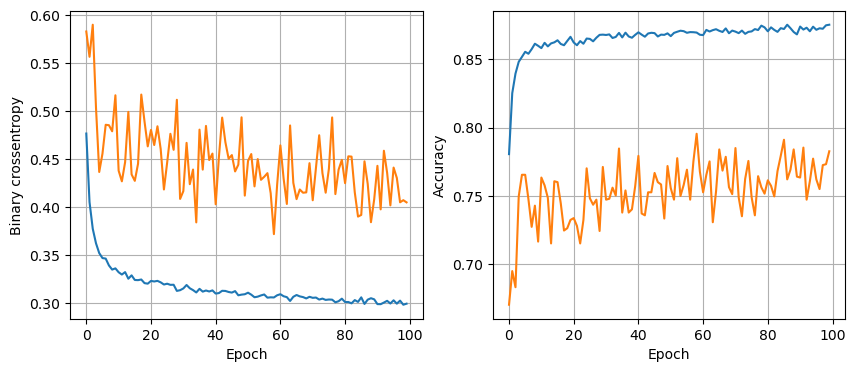

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8679 - loss: 0.3055
32 nodes, dropout 0.2, learning_rate 0.001, batch_size 32


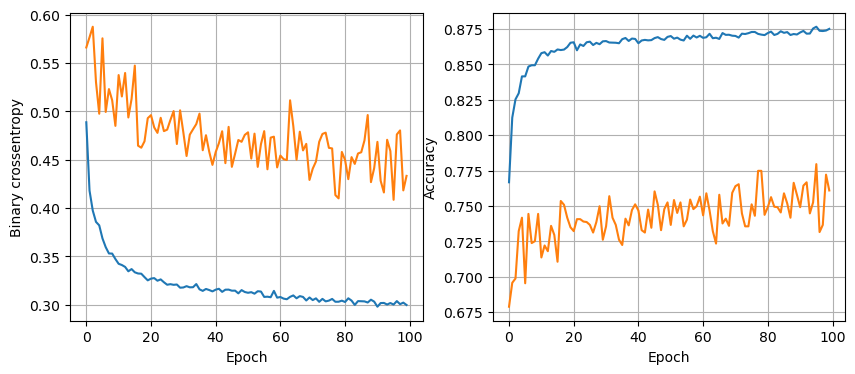

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.2994
32 nodes, dropout 0.2, learning_rate 0.001, batch_size 64


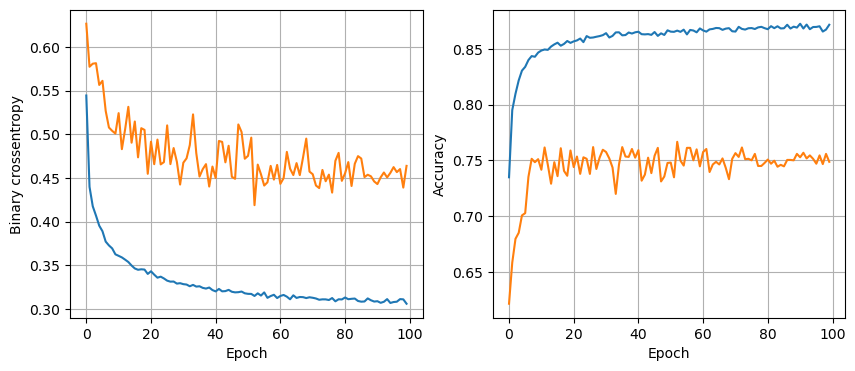

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.3056
32 nodes, dropout 0.2, learning_rate 0.001, batch_size 128


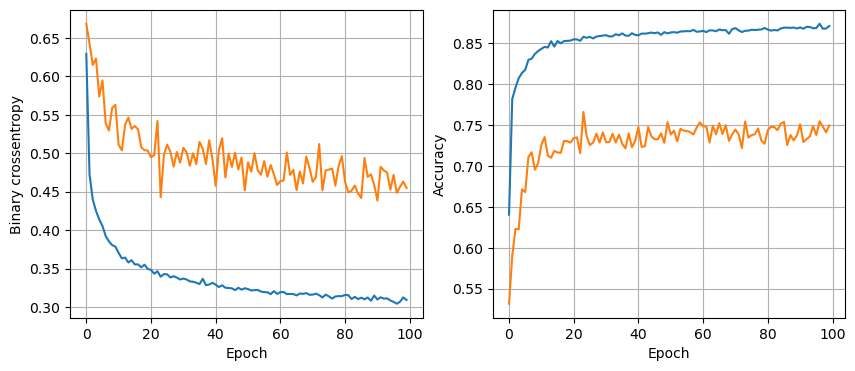

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8661 - loss: 0.3072
64 nodes, dropout 0, learning_rate 0.1, batch_size 32


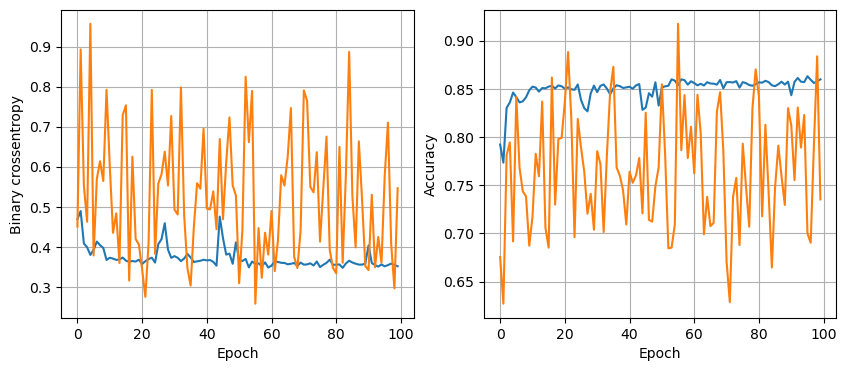

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8443 - loss: 0.3791
64 nodes, dropout 0, learning_rate 0.1, batch_size 64


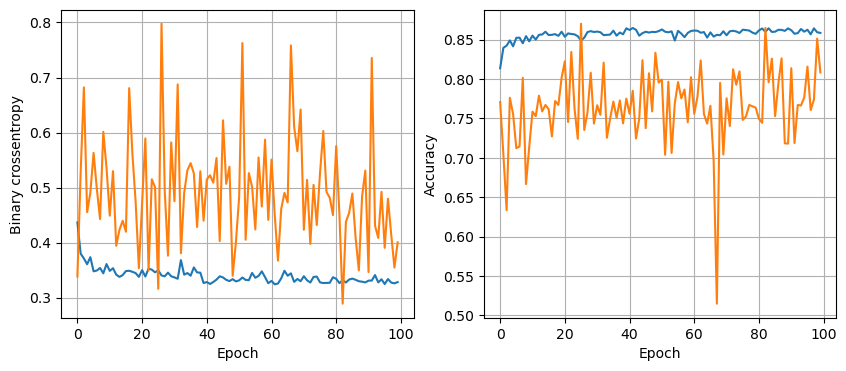

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3557
64 nodes, dropout 0, learning_rate 0.1, batch_size 128


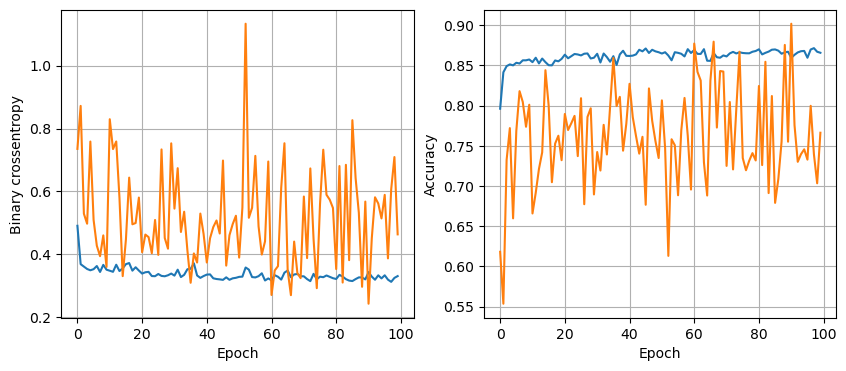

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8651 - loss: 0.3378
64 nodes, dropout 0, learning_rate 0.005, batch_size 32


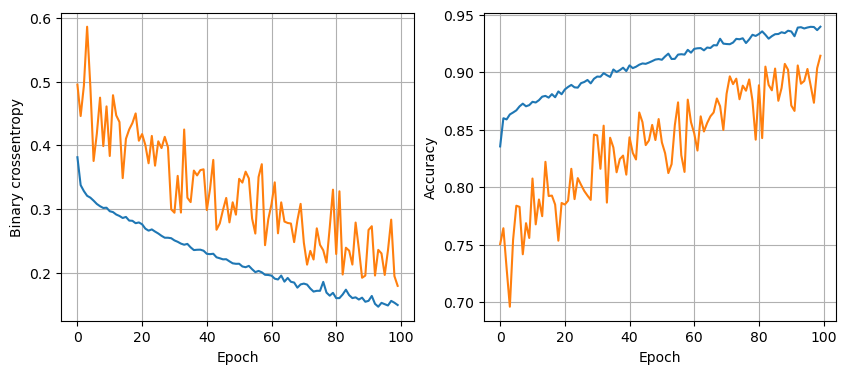

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8536 - loss: 0.5723
64 nodes, dropout 0, learning_rate 0.005, batch_size 64


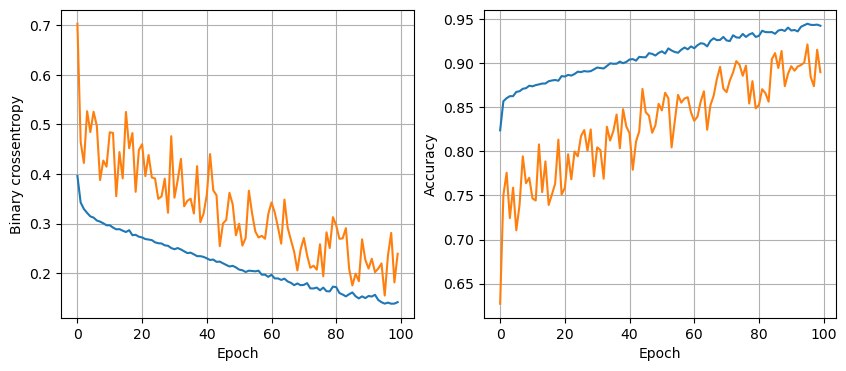

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.6229
64 nodes, dropout 0, learning_rate 0.005, batch_size 128


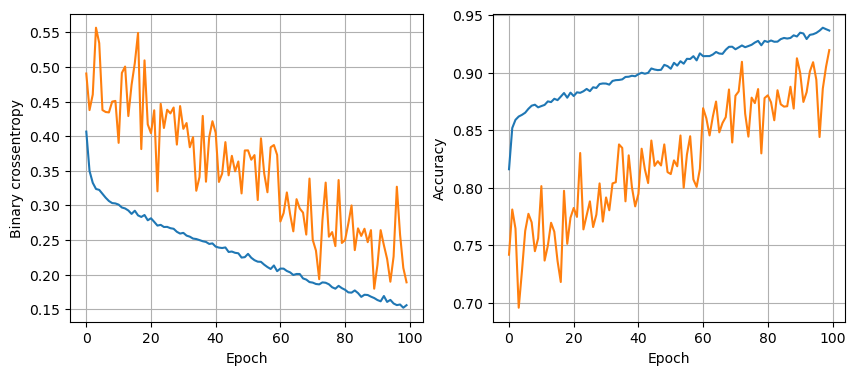

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.4975
64 nodes, dropout 0, learning_rate 0.001, batch_size 32


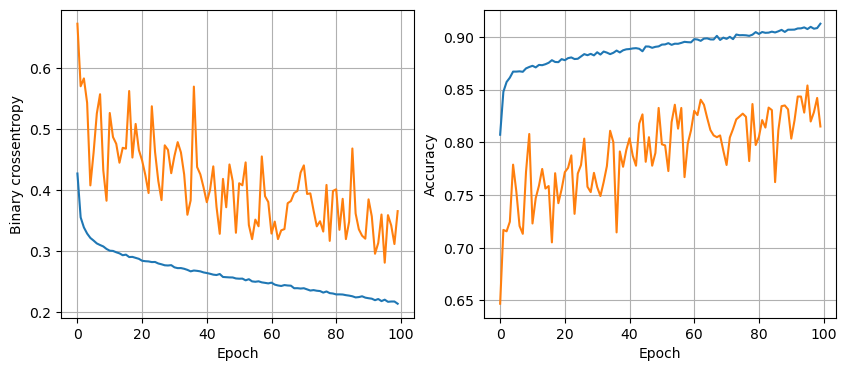

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8684 - loss: 0.3453
64 nodes, dropout 0, learning_rate 0.001, batch_size 64


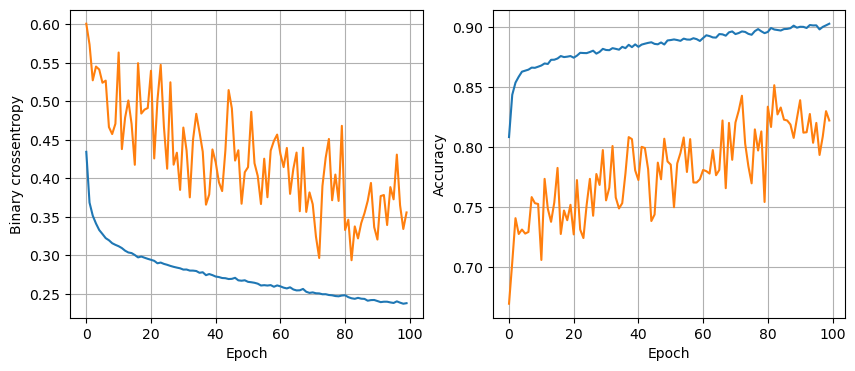

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3417
64 nodes, dropout 0, learning_rate 0.001, batch_size 128


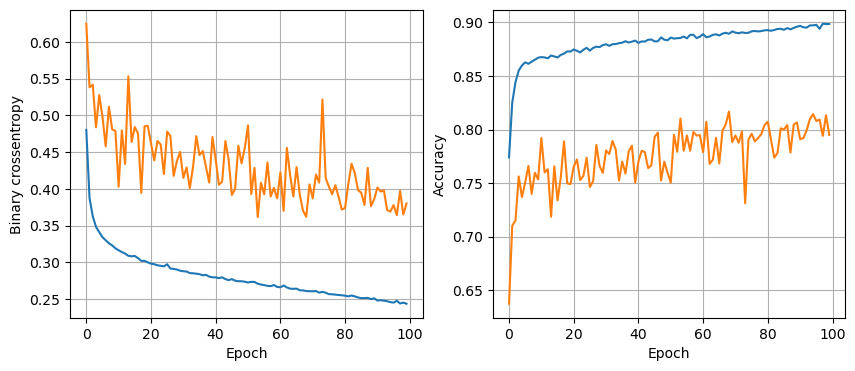

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3390
64 nodes, dropout 0.2, learning_rate 0.1, batch_size 32


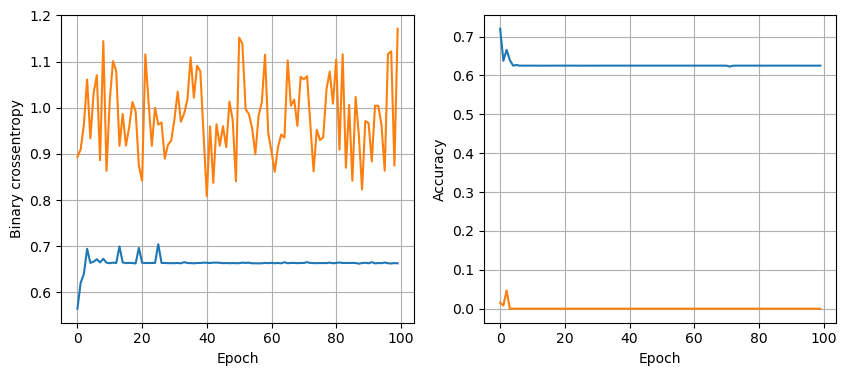

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6554 - loss: 0.6468
64 nodes, dropout 0.2, learning_rate 0.1, batch_size 64


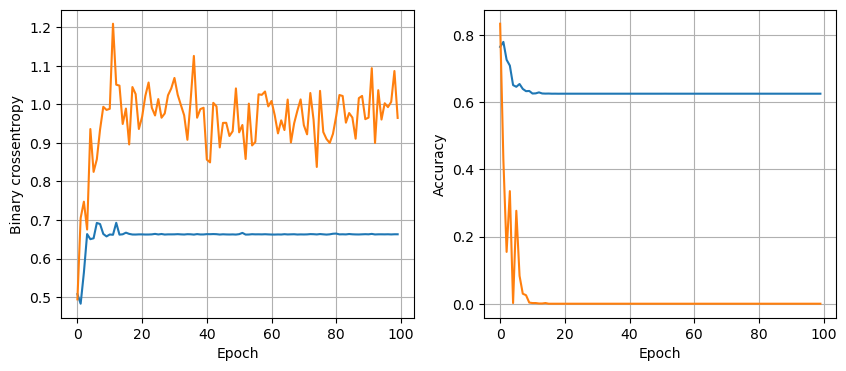

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - loss: 0.6469
64 nodes, dropout 0.2, learning_rate 0.1, batch_size 128


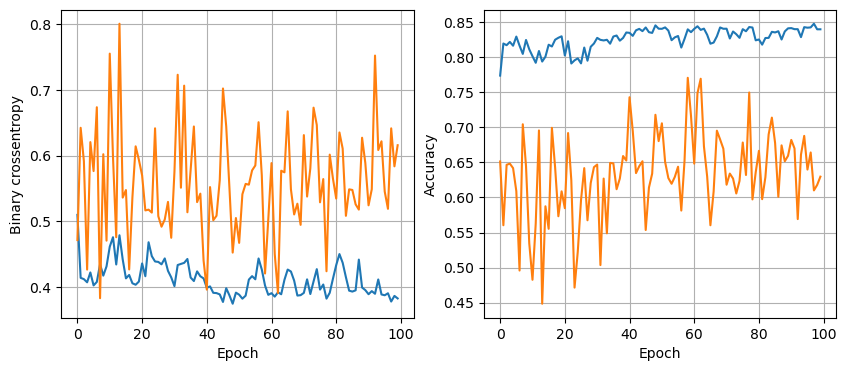

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.3528
64 nodes, dropout 0.2, learning_rate 0.005, batch_size 32


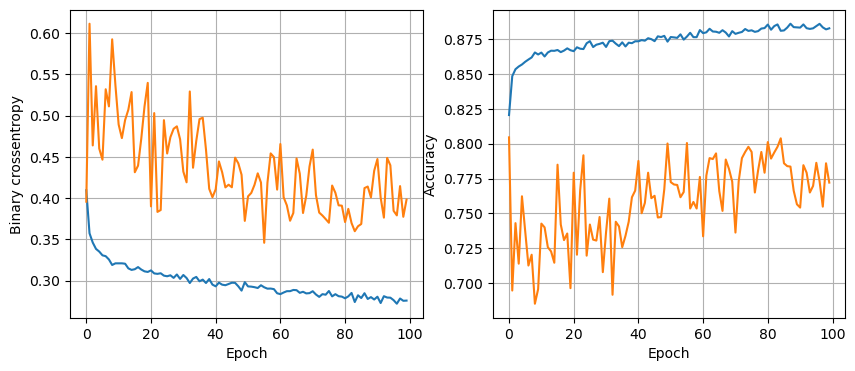

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.3113
64 nodes, dropout 0.2, learning_rate 0.005, batch_size 64


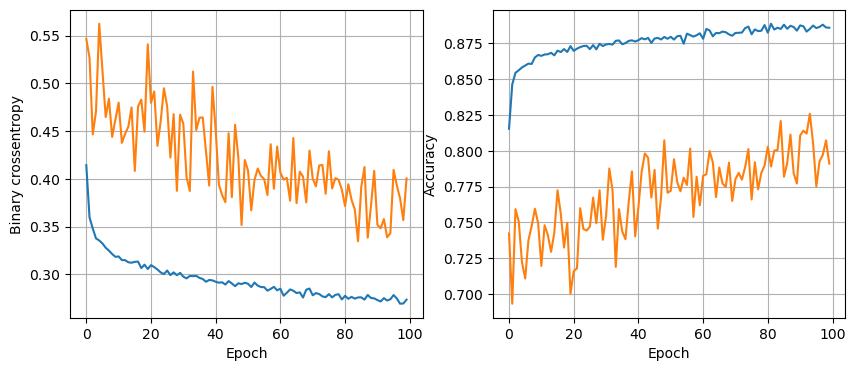

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8732 - loss: 0.3046
64 nodes, dropout 0.2, learning_rate 0.005, batch_size 128


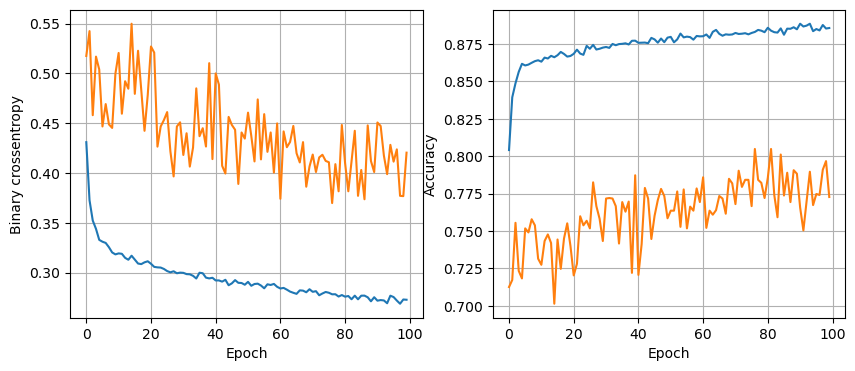

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3039
64 nodes, dropout 0.2, learning_rate 0.001, batch_size 32


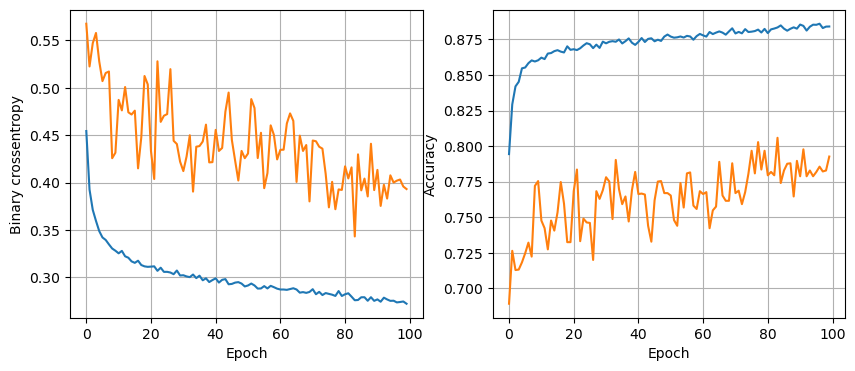

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3052
64 nodes, dropout 0.2, learning_rate 0.001, batch_size 64


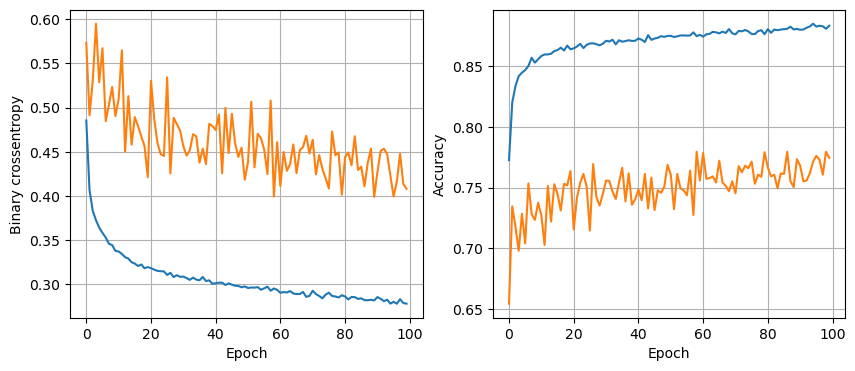

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 0.3076
64 nodes, dropout 0.2, learning_rate 0.001, batch_size 128


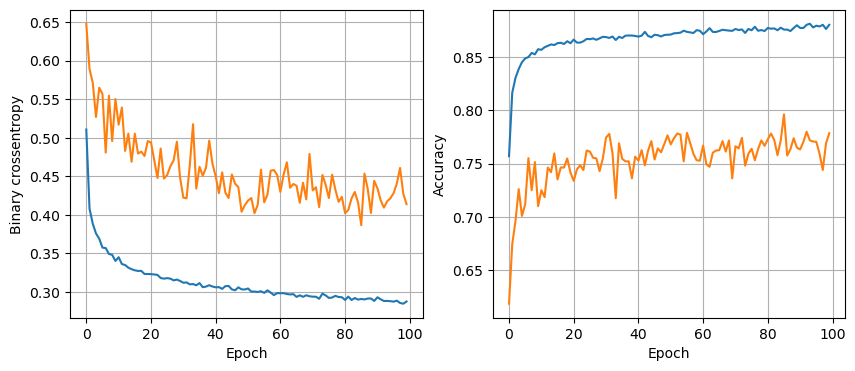

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8698 - loss: 0.3000


In [29]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning_rate {learning_rate}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                   least_val_loss = val_loss
                   least_loss_model = model

In [33]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1350
           1       0.87      0.93      0.90      2454

    accuracy                           0.87      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804



regression

Linear Regression